<a href="https://colab.research.google.com/github/Alejandro-RL/Atividade_2.2/blob/main/Parte%202/C%C3%B3pia_de_PP2_2_2_Proposic%CC%A7a%CC%83o_e_Avaliac%CC%A7a%CC%83o_de_RNAs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Adan Thierry Souza dos Santos - 1915080050
* Alejandro da Rocha Loureiro - 1915080001
* Fernando Araújo Alves Filho - 1915080063
* Victor Brasil de Pina - 1915080079


## Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

### Import

In [39]:
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score,f1_score,precision_score,recall_score

### Dataset

In [2]:
!wget https://www.dropbox.com/s/2j9euhvkl1njfzh/covtype.csv

--2021-12-02 17:43:35--  https://www.dropbox.com/s/2j9euhvkl1njfzh/covtype.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2j9euhvkl1njfzh/covtype.csv [following]
--2021-12-02 17:43:36--  https://www.dropbox.com/s/raw/2j9euhvkl1njfzh/covtype.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8df130b0faf089bfaf3309d89b.dl.dropboxusercontent.com/cd/0/inline/BbGv_whYNV-V8V35XIzSLxCYkZEjibgJPPydi004QI8l3G4oO0raMps6OeqZqpxNf0teAkvYRIbpPhKinyGLR7mEMcTL82_KJzX1W1Tjz85jWLRNauEDfkgSPSNP8Xc0qNzG7ho79aEY4Ob56pvpdD9B/file# [following]
--2021-12-02 17:43:36--  https://uc8df130b0faf089bfaf3309d89b.dl.dropboxusercontent.com/cd/0/inline/BbGv_whYNV-V8V35XIzSLxCYkZEjibgJPPydi004QI8l3G4oO0raMps6OeqZqpxNf0teAkvYRIbpPhKinyGLR7mEMcTL8

## Questão 1

In [3]:
#1
df = pd.read_csv('/content/covtype.csv')

##Questão 2 e 3
### Definindo atributos preditores e atributo alvo

In [4]:
#2 e 3
X = df[df.columns[0:10]]
y = df[df.columns[-1]]

## Questão 4
### Train/Test Split 
70/30

In [5]:
#4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,random_state=42, shuffle=True)

## Questão 5
### Padronização

In [6]:
#5
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

In [7]:
X_train_std

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
110220,-1.213285,1.521970,-1.215756,-0.985653,-0.709902,-0.962484,-0.229567,0.541278,0.614032,-0.199579
363425,0.666947,-0.684312,-0.413945,-0.444373,0.182714,-0.831053,0.817019,-0.166989,-0.667745,-0.668463
111410,0.178158,1.039625,-0.280310,1.447756,-0.229263,2.016207,-0.864994,0.996592,1.346476,-0.496589
552313,-0.289224,0.512618,1.590582,-0.952706,-0.194931,0.389659,-0.939750,1.502497,1.241841,-0.500358
107881,0.745438,-1.068401,-1.082121,-0.364357,-0.349423,0.473647,0.293726,0.136554,-0.013777,1.807877
...,...,...,...,...,...,...,...,...,...,...
110268,0.795388,-0.764703,-0.146675,0.435797,-0.109103,0.411458,0.817019,-0.470532,-0.877015,1.774708
259178,0.759710,0.003476,1.991488,2.102000,4.199487,-0.766940,0.929153,0.237735,-1.164761,0.644713
365838,0.691921,1.173609,0.387866,0.308713,-0.091937,-0.674617,-1.537799,0.693049,1.634222,0.047678
131932,0.377955,1.718481,0.922406,-0.684419,-0.469582,1.522537,-1.313531,-1.077617,0.430921,-1.023518


### Modelo

In [8]:
#5
rede = MLPClassifier(hidden_layer_sizes=(10),activation='relu',max_iter=300,verbose=True)
rede.fit(X_train_std,y_train)

Iteration 1, loss = 0.98760701
Iteration 2, loss = 0.69806665
Iteration 3, loss = 0.67937436
Iteration 4, loss = 0.67310201
Iteration 5, loss = 0.66957157
Iteration 6, loss = 0.66726277
Iteration 7, loss = 0.66558548
Iteration 8, loss = 0.66428774
Iteration 9, loss = 0.66334351
Iteration 10, loss = 0.66246159
Iteration 11, loss = 0.66180273
Iteration 12, loss = 0.66095224
Iteration 13, loss = 0.66021251
Iteration 14, loss = 0.65948812
Iteration 15, loss = 0.65871664
Iteration 16, loss = 0.65790952
Iteration 17, loss = 0.65715018
Iteration 18, loss = 0.65626877
Iteration 19, loss = 0.65561126
Iteration 20, loss = 0.65492438
Iteration 21, loss = 0.65454501
Iteration 22, loss = 0.65426400
Iteration 23, loss = 0.65402677
Iteration 24, loss = 0.65376328
Iteration 25, loss = 0.65352565
Iteration 26, loss = 0.65330803
Iteration 27, loss = 0.65308839
Iteration 28, loss = 0.65279157
Iteration 29, loss = 0.65261774
Iteration 30, loss = 0.65238072
Iteration 31, loss = 0.65220327
Iteration 32, los

MLPClassifier(hidden_layer_sizes=10, max_iter=300, verbose=True)

## Questão 6 - Validação da questão 5

In [9]:
## Essa função vai ser reutilizada posteriormente
def validation(rede, X_test_std,y_test, p = True):
  y_pred = rede.predict(X_test_std)
  cmatrix = confusion_matrix(y_test,y_pred)
  
  #6.2 Acurácia
  acc = balanced_accuracy_score(y_test,y_pred,adjusted=False)
  

  #6.4 Precisão
  pre = precision_score(y_test,y_pred,average='weighted')
  

  #6.5 Revocação 
  rev = recall_score(y_test,y_pred,average='weighted')
  

  #6.3 F-Score
  f1 = f1_score(y_test,y_pred,average='weighted')
  

  if (p):
    print("Matriz de confusão:\n")
    print(cmatrix)
    print("\nAcurácia: ",acc)
    print("\nPrecisão: ",pre)
    print("\nRevocação: ",rev)
    print("\nF-Score: ",f1)
  return cmatrix, acc, pre, rev, f1

In [ ]:
validation(rede,X_test_std, y_test)
!

Matriz de confusão:

[[45645 17044     5     0     5     8   849]
 [16569 66680  1230     0    87   489    23]
 [    0  1708  7812   222     0   896     0]
 [    0     2   376   344     0    73     0]
 [    1  2595    63     0   239    43     0]
 [    0  1392  2521    73     2  1239     0]
 [ 3427    65     0     0     0     0  2577]]

Acurácia:  0.48741573116909365

Precisão:  0.7110638574518137

Revocação:  0.7144758582706077

F-Score:  0.7054645541859155


## Questão 7- Repetir a mesma rede anterior 100x

### Train/Test split

In [ ]:

def acompanha(x):
  saida = '['
  for i in range(x):
    clear_output(wait=True)
    saida+=':'
  for k in range(100 - x):
    saida += ' '
  saida+=']'
  saida+= ' '+ str(x+1) + '%'
  print(saida)

In [ ]:
resultados = []
for x in range(15):
  #7 e 7.1
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,train_size= 0.7, shuffle=True)
  
  ## Padronização
  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
  
  ### Modelo
  rede1 = MLPClassifier(hidden_layer_sizes=(10),activation='relu',max_iter=300,verbose=False)
  rede1.fit(X_train_std,y_train)

  resultados.append(validation(rede1, X_test, y_test, p = False))
  acompanha(x)

[::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::: ] 99%


In [ ]:
for resultado in resultados:
  print(resultado)

### 7.2 Média e Desvio Padrão  da acurácia e F-score

#### Media

In [ ]:
soma_acc = 0
soma_f1score = 0
for resultado in resultados:
  soma_acc+= resultado[1]
  soma_f1score+= resultado[4]
media_acc = soma_acc/len(resultados)
media_f1 = soma_f1score/len(resultados)
print(f"medias:\nAcurácia: {media_acc}\nf1 score:{media_f1}")

medisa:
Acurácia: 0.1460263929778969
f1 score:0.02253955338196134


#### Desvio padrão

In [ ]:
somatorio_acc = 0
somatorio_f1 = 0
for resultado in resultados:
  somatorio_acc += (resultado[1] - media_acc)**(2)
  somatorio_f1 += (resultado[4] - media_f1)**(2)

dp_acc = (somatorio_acc/len(resultado))**(1/2)
dp_f1 = (somatorio_f1/len(resultado))**(1/2)
print(f"desvio padrao:\nAcurácia: {dp_acc}\nf1 score:{dp_f1}")

desvio padrao:
Acurácia: 0.026902277496345543
f1 score:0.16580714390450854


## Questão 8 - utilizando otimizador SGD

In [ ]:
resultados = []
for x in range(15):
  #7 e 7.1
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,train_size= 0.7, shuffle=True)
  
  ## Padronização
  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)
  
  ### Modelo
  rede1 = MLPClassifier(hidden_layer_sizes=(10),activation='relu',max_iter=300,verbose=False, solver = 'sgd')
  rede1.fit(X_train_std,y_train)

  resultados.append(validation(rede1, X_test, y_test, p = False))
  acompanha(x)



In [ ]:
for resultado in resultados:
  print(resultado)

[(array([[    0,     0,     0,     0,     0,     0, 63514],
         [    0,     0,     0,     0,     0,     0, 85045],
         [    0,     0,     0,     0,     0,     0, 10747],
         [    0,     0,     0,     0,     0,     0,   804],
         [    0,     0,     0,     0,     0,     0,  2844],
         [    0,     0,     0,     0,     0,     0,  5235],
         [    0,     0,     0,     0,     0,     0,  6115]]),
  0.14285714285714285,
  0.0012307737231831354,
  0.03508238479897191,
  0.0023781174160782763),
 (array([[    0,     0,     0,     0,     0,     0, 63923],
         [    0,     0,     0,     0,     0,     0, 85627],
         [    0,     0,     0,     0,     0,     0, 10813],
         [    0,     0,     0,     0,     0,     0,   809],
         [    0,     0,     0,     0,     0,     0,  2861],
         [    0,     0,     0,     0,     0,     0,  5275],
         [    0,     0,     0,     0,     0,     0,  6158]]),
  0.14285714285714285,
  0.001231667317439271,
  0.03509511

In [ ]:
soma_acc = 0
soma_f1score = 0
for resultado in resultados:
  soma_acc+= resultado[1]
  soma_f1score+= resultado[4]
media_acc = soma_acc/len(resultados)
media_f1 = soma_f1score/len(resultados)
print(f"medias:\nAcurácia: {media_acc}\nf1 score:{media_f1}")



somatorio_acc = 0
somatorio_f1 = 0

for resultado in resultados:
  somatorio_acc += (resultado[1] - media_acc)**(2)
  somatorio_f1 += (resultado[4] - media_f1)**(2)

dp_acc = (somatorio_acc/len(resultado))**(1/2)
dp_f1 = (somatorio_f1/len(resultado))**(1/2)
print(f"desvio padrao:\nAcurácia: {dp_acc}\nf1 score:{dp_f1}")

<h1>Houve influência da escolha do otimizador no desempenho da rede?

R: 

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [10]:
#1
#Uma ou duas camadas ocultas
#solver Adam ou SGD
# épocas: 100, 150 ou 200
redes = [[] for i in range(10)]
redes[0] = MLPClassifier(hidden_layer_sizes=(10),activation='tanh',max_iter=100,solver="adam")
redes[1] = MLPClassifier(hidden_layer_sizes=(10),activation='relu',max_iter=150,solver="sgd")
redes[2] = MLPClassifier(hidden_layer_sizes=(10),activation='logistic',max_iter=200,solver="adam")
redes[3] = MLPClassifier(hidden_layer_sizes=(10,15),activation='identity',max_iter=100,solver="adam")
redes[4] = MLPClassifier(hidden_layer_sizes=(10,15),activation='relu',max_iter=150,solver="adam")
redes[5] = MLPClassifier(hidden_layer_sizes=(10,15),activation='tanh',max_iter=200,solver="adam")
redes[6] = MLPClassifier(hidden_layer_sizes=(20),activation='relu',max_iter=100,solver="adam")
redes[7] = MLPClassifier(hidden_layer_sizes=(20),activation='logistic',max_iter=150,solver="adam")
redes[8] = MLPClassifier(hidden_layer_sizes=(20),activation='identity',max_iter=200,solver="adam")
redes[9] = MLPClassifier(hidden_layer_sizes=(30,40),activation='logistic',max_iter=200,solver="adam")

In [14]:
#2 Avaliar cada rede 15 vezes

#métricas
matriz_c = [[] for i in range(len(redes))]
acc = [[] for i in range(len(redes))]
pre = [[] for i in range(len(redes))]
rev = [[] for i in range(len(redes))]
f1 = [[] for i in range(len(redes))]

for i in range(15):
  #Inicialização
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,shuffle=True)

  #Normalização
  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

  for j in range(len(redes)):
    redes[j].fit(X_train_std,y_train)
    a,b,c,d,e = validation(redes[j], X_test_std,y_test, p = False)

    
    matriz_c[j].append(a)
    acc[j].append(b)
    pre[j].append(c)
    rev[j].append(d)
    f1[j].append(e)





In [15]:
#3
#3.1 Top-3 melhores redes no tocante à F-Score e Acurácia

#Usando a média para descobrir a melhor rede
acc_m =[[] for i in range(len(acc))]
f1_m =[[] for i in range(len(f1))]
resultado = [[] for i in range(len(f1))]
indices = [i for i in range(len(f1))]
#Média das Acurácias
for i in range(len(acc)):
  aux = 0
  for j in range(len(acc[i])):
    aux += acc[i][j]

  acc_m[i] = (aux/(j+1))

#Média dos F_Scores
for i in range(len(f1)):
  aux = 0
  for j in range(len(f1[i])):
    aux += f1[i][j]

  f1_m[i] = (aux/(j+1))


# Soma dos valores
#As redes com maior soma de acurácia e f-score serão selecionadas
for i in range(len(resultado)):
  resultado[i] = acc_m[i] + f1_m[i]

resultado1 = sorted(zip(resultado,indices), reverse=True)[:3]
print("Melhores redes:\n")
for i in resultado1:

  print("Rede de índice: ",i[1])
  print("Acurácia Média: ",acc_m[i[1]])
  print("F-Score Médio: ",f1_m[i[1]])
  print('')



  

Melhores redes:

Rede de índice:  0
Acurácia Média:  0.4659169975016755
F-Score Médio:  0.7097337796148844

Rede de índice:  2
Acurácia Média:  0.4625255940365857
F-Score Médio:  0.7053972500125174

Rede de índice:  1
Acurácia Média:  0.44835882480236844
F-Score Médio:  0.7032046917794822



In [16]:
#3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn

#Melhor desempenho = maior valor de f-score + acurácia
desempenho = [[] for i in range(len(resultado1))]
for i in range(len(resultado1)):
  indice = resultado1[i][1]
  for j in range(len(acc[indice])):
    desempenho[i].append([acc[indice][j]+f1[indice][j],j])

desempenho1 = []

for i in range(len(desempenho)):
  desempenho1.append(max(desempenho[i]))

for i in range(len(resultado1)):
  print("\nO melhor desempenho da rede",resultado1[i][1]," foi na repetição:",desempenho1[i][1]+1)
  print("\n Matriz de Confusão: ")
  m = matriz_c[resultado1[i][1]][desempenho1[i][1]]
  print(m)



O melhor desempenho da rede 0  foi na repetição: 1

 Matriz de Confusão: 
[[45195 17860     3     0     2    28   596]
 [14855 68101  1186     5    39   501   134]
 [    0  1896  8326    92     0   667     0]
 [    0     6   439   286     0    69     0]
 [   19  2522    30     0   209    27     0]
 [    0  1432  2699    19     0  1001     0]
 [ 2950    28     0     0     0     0  3082]]

O melhor desempenho da rede 2  foi na repetição: 2

 Matriz de Confusão: 
[[44526 17284     5     0    10    11  1832]
 [15938 67478  1087     2    81   252    26]
 [    0  2097  7915    94     0   684     0]
 [    0     5   379   351     0    65     0]
 [   11  2541    31     0   242     1     0]
 [    0  1690  2686    32     0   818     0]
 [ 3031    23     0     0     0     0  3076]]

O melhor desempenho da rede 1  foi na repetição: 2

 Matriz de Confusão: 
[[45657 17083     7     0     2    28   891]
 [16183 67058  1014     0     6   571    32]
 [    0  1915  7951    99     0   825     0]
 [    0 

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

1.\
$N_i = 10$ \
$N_o = 7$

2. \
$N_{h1} = 0.5 \cdot \sqrt{10 \cdot 7} = 4 $ \
$N_{h1} = 2 \cdot \sqrt{10 \cdot 7} = 16 $ \
$N_{h1} = 3 \cdot \sqrt{10 \cdot 7} = 25 $

In [17]:
#3
#Nh1 = 4
redes1 = [[] for i in range(30)]
redes1[0] = MLPClassifier(hidden_layer_sizes=(4),activation='tanh',max_iter=100,solver="adam")
redes1[1] = MLPClassifier(hidden_layer_sizes=(4),activation='relu',max_iter=150,solver="sgd")
redes1[2] = MLPClassifier(hidden_layer_sizes=(4),activation='logistic',max_iter=200,solver="adam")
redes1[3] = MLPClassifier(hidden_layer_sizes=(4),activation='identity',max_iter=100,solver="adam")
redes1[4] = MLPClassifier(hidden_layer_sizes=(4),activation='relu',max_iter=200,solver="adam")
redes1[5] = MLPClassifier(hidden_layer_sizes=(4,4),activation='tanh',max_iter=100,solver="adam")
redes1[6] = MLPClassifier(hidden_layer_sizes=(4,4),activation='relu',max_iter=100,solver="adam")
redes1[7] = MLPClassifier(hidden_layer_sizes=(4,4),activation='logistic',max_iter=150,solver="adam")
redes1[8] = MLPClassifier(hidden_layer_sizes=(4,4),activation='identity',max_iter=200,solver="adam")
redes1[9] = MLPClassifier(hidden_layer_sizes=(4,4),activation='tanh',max_iter=200,solver="adam")

In [18]:
#Nh1 = 16
redes1[10] = MLPClassifier(hidden_layer_sizes=(16),activation='tanh',max_iter=100,solver="adam")
redes1[11] = MLPClassifier(hidden_layer_sizes=(16),activation='relu',max_iter=150,solver="sgd")
redes1[12] = MLPClassifier(hidden_layer_sizes=(16),activation='logistic',max_iter=200,solver="adam")
redes1[13] = MLPClassifier(hidden_layer_sizes=(16),activation='identity',max_iter=100,solver="adam")
redes1[14] = MLPClassifier(hidden_layer_sizes=(16),activation='relu',max_iter=200,solver="adam")
redes1[15] = MLPClassifier(hidden_layer_sizes=(16,16),activation='tanh',max_iter=100,solver="adam")
redes1[16] = MLPClassifier(hidden_layer_sizes=(16,16),activation='relu',max_iter=100,solver="adam")
redes1[17] = MLPClassifier(hidden_layer_sizes=(16,16),activation='logistic',max_iter=150,solver="adam")
redes1[18] = MLPClassifier(hidden_layer_sizes=(16,16),activation='identity',max_iter=200,solver="adam")
redes1[19] = MLPClassifier(hidden_layer_sizes=(16,16),activation='tanh',max_iter=200,solver="adam")

In [19]:
#Nh1 = 25
redes1[20] = MLPClassifier(hidden_layer_sizes=(25),activation='tanh',max_iter=100,solver="adam")
redes1[21] = MLPClassifier(hidden_layer_sizes=(25),activation='relu',max_iter=150,solver="sgd")
redes1[22] = MLPClassifier(hidden_layer_sizes=(25),activation='logistic',max_iter=200,solver="adam")
redes1[23] = MLPClassifier(hidden_layer_sizes=(25),activation='identity',max_iter=100,solver="adam")
redes1[24] = MLPClassifier(hidden_layer_sizes=(25),activation='relu',max_iter=200,solver="adam")
redes1[25] = MLPClassifier(hidden_layer_sizes=(25,25),activation='tanh',max_iter=100,solver="adam")
redes1[26] = MLPClassifier(hidden_layer_sizes=(25,25),activation='relu',max_iter=100,solver="adam")
redes1[27] = MLPClassifier(hidden_layer_sizes=(25,25),activation='logistic',max_iter=150,solver="adam")
redes1[28] = MLPClassifier(hidden_layer_sizes=(25,25),activation='identity',max_iter=200,solver="adam")
redes1[29] = MLPClassifier(hidden_layer_sizes=(25,25),activation='tanh',max_iter=200,solver="adam")

In [ ]:
#3.1
#2 Avaliar cada rede 15 vezes

#métricas
matriz_c = [[] for i in range(len(redes1))]
acc = [[] for i in range(len(redes1))]
pre = [[] for i in range(len(redes1))]
rev = [[] for i in range(len(redes1))]
f1 = [[] for i in range(len(redes1))]

for i in range(15):
  #Inicialização
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,shuffle=True)

  #Normalização
  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

  for j in range(len(redes1)):
    redes1[j].fit(X_train_std,y_train)
    a,b,c,d,e = validation(redes1[j], X_test_std,y_test, p = False)

    
    matriz_c[j].append(a)
    acc[j].append(b)
    pre[j].append(c)
    rev[j].append(d)
    f1[j].append(e)


In [22]:
#-------------------------------------------------------------------------------
#Usando a média para descobrir a melhor rede
acc_m =[[] for i in range(len(acc))]
f1_m =[[] for i in range(len(f1))]
resultado = [[] for i in range(len(f1))]
indices = [i for i in range(len(f1))]
#Média das Acurácias
for i in range(len(acc)):
  aux = 0
  for j in range(len(acc[i])):
    aux += acc[i][j]
  acc_m[i] = (aux/(j+1))

#Média dos F_Scores
for i in range(len(f1)):
  aux = 0
  for j in range(len(f1[i])):
    aux += f1[i][j]

  f1_m[i] = (aux/(j+1))


# Soma dos valores
#As redes com maior soma de acurácia e f-score serão selecionadas
for i in range(len(resultado)):
  resultado[i] = acc_m[i] + f1_m[i]

resultado2 = sorted(zip(resultado,indices), reverse=True)[:3]

print("Melhores redes:\n")
for i in resultado2:
  
  print("Rede de índice: ",i[1])
  print("Acurácia Média: ",acc_m[i[1]])
  print("F-Score Médio: ",f1_m[i[1]])
  print('')


Melhores redes:

Rede de índice:  0
Acurácia Média:  0.38850623617680463
F-Score Médio:  0.6864047284056343

Rede de índice:  2
Acurácia Média:  0.38050955835760925
F-Score Médio:  0.68447993227019

Rede de índice:  1
Acurácia Média:  0.37614066429332293
F-Score Médio:  0.6815787267546094



## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

In [45]:
#1
redes2 = []
for i in range(len(resultado1)):  
  redes2.append(redes[resultado1[i][1]])

for i in range(len(resultado2)):
  redes2.append(redes1[resultado2[i][1]])

#2.1
for i in range(len(redes2)):
  redes2[i].max_iter=200



In [46]:
#2
X = df[df.columns[0:54]]
y = df[df.columns[-1]]

In [ ]:
#métricas
matriz_c = [[] for i in range(len(redes2))]
acc = [[] for i in range(len(redes2))]
pre = [[] for i in range(len(redes2))]
rev = [[] for i in range(len(redes2))]
f1 = [[] for i in range(len(redes2))]

for i in range(15):
  #Inicialização
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,shuffle=True)

  #Normalização
  X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
  X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

  for j in range(len(redes2)):
    redes1[j].fit(X_train_std,y_train)
    a,b,c,d,e = validation(redes1[j], X_test_std,y_test, p = False)

    
    matriz_c[j].append(a)
    acc[j].append(b)
    pre[j].append(c)
    rev[j].append(d)
    f1[j].append(e)


In [74]:
#-------------------------------------------------------------------------------
acc_m =[[] for i in range(len(acc))]
f1_m =[[] for i in range(len(f1))]
resultado = [[] for i in range(len(f1))]
indices = [i for i in range(len(f1))]
dp_acc = [[] for i in range(len(acc))]
dp_f1 = [[] for i in range(len(f1))]
#Média das Acurácias
for i in range(len(acc)):
  aux = 0
  for j in range(len(acc[i])):
    aux += acc[i][j]
  acc_m[i] = (aux/(j+1))

#Média dos F_Scores
for i in range(len(f1)):
  aux = 0
  for j in range(len(f1[i])):
    aux += f1[i][j]
  
  f1_m[i] = (aux/(j+1))





In [77]:
#DP das Acurácias

for i in range(len(acc)):
  aux = 0
  for j in range(len(acc[i])):
    aux += (acc[i][j] - acc_m[i])**2

  dp_acc[i] = (aux/(j+1))**(1/2)


#DP dos F-Scores
for i in range(len(f1)):
  aux = 0
  for j in range(len(f1[i])):
    aux += (f1[i][j] - f1_m[i])**2

  dp_f1[i] = (aux/(j+1))**(1/2)

    

In [82]:
#2.2
for i in range(len(redes2)):
  print("Rede de índice: ",i)
  print("Acurácia média +- dp:")
  print(str(acc_m[i])+" +- "+str(dp_acc[i]))
  print('')
  print("F-Score médio +- dp:")
  print(str(f1_m[i])+" +- "+str(dp_f1[i]))
  print('')
  print('-------------------------------')



Rede de índice:  0
Acurácia média +- dp:
0.44730309098390253 +- 0.008121529036661329

F-Score médio +- dp:
0.7175809482106256 +- 0.001716494445197947

-------------------------------
Rede de índice:  1
Acurácia média +- dp:
0.44209581729432573 +- 0.02042789380711696

F-Score médio +- dp:
0.7075797348278007 +- 0.0018988267789818991

-------------------------------
Rede de índice:  2
Acurácia média +- dp:
0.45298120664537517 +- 0.008160267743372696

F-Score médio +- dp:
0.7209970210270035 +- 0.0011990167532691665

-------------------------------
Rede de índice:  3
Acurácia média +- dp:
0.0 +- 0.0

F-Score médio +- dp:
0.0 +- 0.0

-------------------------------
Rede de índice:  4
Acurácia média +- dp:
0.0 +- 0.0

F-Score médio +- dp:
0.0 +- 0.0

-------------------------------
Rede de índice:  5
Acurácia média +- dp:
0.0 +- 0.0

F-Score médio +- dp:
0.0 +- 0.0

-------------------------------


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


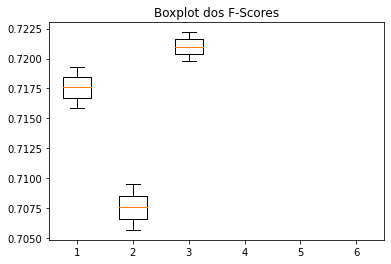

In [106]:
#3

fig, ax  = plt.subplots()
ax.set_title("Boxplot dos F-Scores")
ax.boxplot(f1[:])
!

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?